In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
local_people = pd.read_excel("./output/지역별_퇴사자3.xlsx")
local_people = local_people.iloc[:, [0, -9, -8, -7]]
local_people = local_people.rename(
    columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
local_people = local_people.drop(index=0)
list = local_people.iloc[1:, 3]
new = []
for i in range(len(list)):
    num_str = list.iloc[i].replace(",", "")
    # print(num_str)
    new.append(int(num_str))
new

[7500,
 1851,
 1666,
 3525,
 205,
 1962,
 1894,
 11975,
 501,
 3179,
 3434,
 1016,
 650,
 715,
 8486,
 74]

In [3]:
work_time = pd.read_excel("./input/2020/실제_근무시간과_희망_근무시간_비교_2020.xlsx")
total_people = work_time.iloc[10:27, 2]
work_time_high = work_time.iloc[10:27, -2]
work_time_low = work_time.iloc[10:27, 3]
work_time
total_people

work_time_low_satisfied = []
work_time_high_satisfied = []
for i in range(len(total_people)):
    # print(total_people.iloc[i])
    work_time_high_satisfied.append(
        int(total_people.iloc[i]*work_time_high.iloc[i]/100+0.5))
    work_time_low_satisfied.append(
        int(total_people.iloc[i]*work_time_low.iloc[i]/100+0.5))
work_time_high_satisfied[5] += work_time_high_satisfied[7]
work_time_low_satisfied[5] += work_time_low_satisfied[7]
del work_time_high_satisfied[7]
del work_time_low_satisfied[7]
work_time_low_satisfied
# work_time_high_satisfied
# 적은 집단과 많은 집단을 두 개로 나눠서 데이터를 돌려보자

[1659,
 379,
 350,
 306,
 203,
 292,
 130,
 2361,
 214,
 139,
 286,
 127,
 289,
 340,
 368,
 106]

In [4]:
df = pd.DataFrame({"낮은_근무시간": work_time_low_satisfied,
                  "높은_근무시간": work_time_high_satisfied, "신입_퇴사자": new})
correlation_low = df["낮은_근무시간"].corr(df["신입_퇴사자"])
correlation_high = df["높은_근무시간"].corr(df["신입_퇴사자"])
print(f"낮은 근무시간과 퇴사자 수의 상관관계 : {correlation_low}")
print(f"높은 근무시간과 퇴사자 수의 상관관계 : {correlation_high}")
df

낮은 근무시간과 퇴사자 수의 상관관계 : 0.826719245736147
높은 근무시간과 퇴사자 수의 상관관계 : 0.8406699966357438


,낮은_근무시간,높은_근무시간,신입_퇴사자
0,1659,811,7500
1,379,444,1851
2,350,302,1666
3,306,338,3525
4,203,207,205
5,292,224,1962
6,130,139,1894
7,2361,1154,11975
8,214,128,501
9,139,115,3179


In [5]:
import statsmodels.api as sm

df = pd.DataFrame({"낮은_근무시간": work_time_low_satisfied,
                  "높은_근무시간": work_time_high_satisfied, "신입_퇴사자": new})
correlation_low = df["낮은_근무시간"].corr(df["신입_퇴사자"])
# print(correlation)

X = df['낮은_근무시간']
X = sm.add_constant(X)
Y = df['신입_퇴사자']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 신입_퇴사자   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     30.23
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           7.85e-05
Time:                        23:36:09   Log-Likelihood:                -143.12
No. Observations:                  16   AIC:                             290.2
Df Residuals:                      14   BIC:                             291.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        898.4507    630.579      1.425      0.1

c:\Users\dawoo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
import statsmodels.api as sm

df = pd.DataFrame({"낮은_근무시간": work_time_low_satisfied,
                  "높은_근무시간": work_time_high_satisfied, "신입_퇴사자": new})
correlation_low = df["높은_근무시간"].corr(df["신입_퇴사자"])
# print(correlation)

X = df['높은_근무시간']
X = sm.add_constant(X)
Y = df['신입_퇴사자']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 신입_퇴사자   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     33.74
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           4.54e-05
Time:                        23:36:09   Log-Likelihood:                -142.51
No. Observations:                  16   AIC:                             289.0
Df Residuals:                      14   BIC:                             290.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -323.7689    750.466     -0.431      0.6

c:\Users\dawoo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<Axes: xlabel='낮은_근무시간', ylabel='신입_퇴사자'>

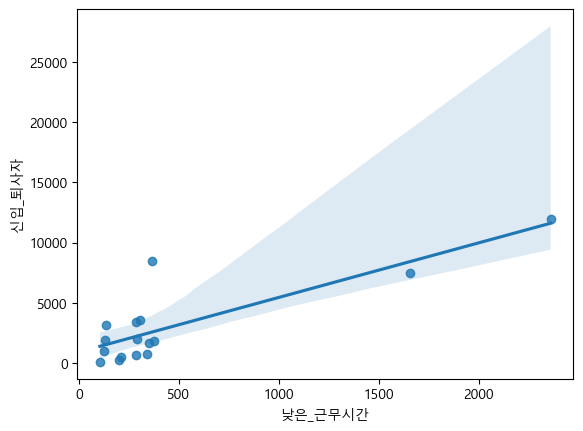

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df['낮은_근무시간'], y=df['신입_퇴사자'])

<Axes: xlabel='높은_근무시간', ylabel='신입_퇴사자'>

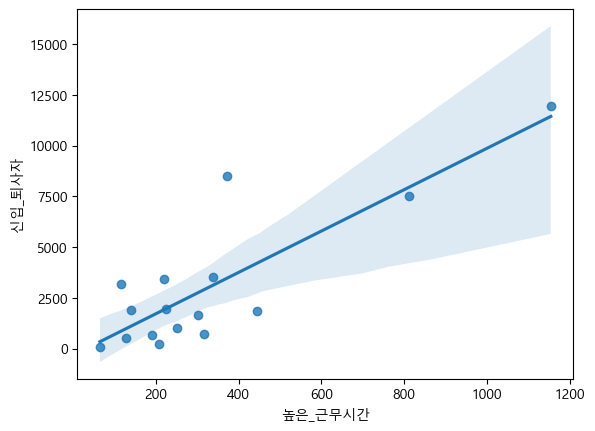

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df['높은_근무시간'], y=df['신입_퇴사자'])